¡Hola!

Mi nombre es Marcos Torres, seré el encargado de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Este proceso es muy parecido al que se recibe de un gerente o de un Senior Data Scientist en un trabajo real, por lo que te estarás preparando para la experiencia en la vida real.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st

#### Estudio de la información general

In [2]:
dataset = pd.read_csv('/datasets/games.csv')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien, usaste una celda independiente para leer las librerías y otra para leer los datos.
</div>

In [3]:
dataset.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se puede observar alguna cantidad de datos ausentes o NaN  en las siguientes filas:
- Name
- Year_of_Release
- Genre
- Critic_Score
- User_Score
- Rating

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy bien, usaste correctamente las funciones de pandas para explorar los datos.
</div>

#### Preparación de los datos

##### Cambio de los nombres de las columnas a minúsculas.

In [5]:
dataset = dataset.rename(
    columns={
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'year_of_release',
    'Genre':'genre',
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating'}
              )

In [6]:
dataset.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy bien, también se puede usar el método `.str.lower()` para convertir todas las columnas a minusculas.
</div>

##### Conversión de los tipos de datos

In [7]:
dataset['user_score'] = pd.to_numeric(dataset['user_score'], errors='coerce')

In [8]:
dataset['user_score'].dtypes

dtype('float64')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Convertiste correctamente los datos.
</div>

Solo he podido cambiar user_score de object a float, aunque me hubiera gustado también cambiar year_of_release a entero esto no es posible debido a la cantidad de datos ausentes, por lo que realizaré el cambio posteriormente.

##### Tratamiento de valores ausentes

In [9]:
dataset.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

##### Valores ausentes en critic_score

array([[<AxesSubplot:title={'center':'critic_score'}>]], dtype=object)

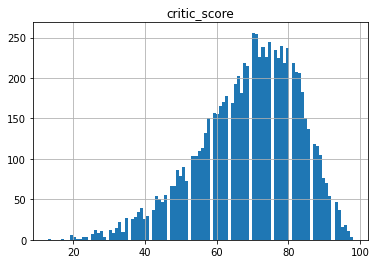

In [10]:
dataset.hist('critic_score',bins=100)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy bien, el histograma muestra correctamente la distribución de la calificación de los críticos.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

También podrías reducir la cantidad de bins para que desaparezcan los espacios vacíos que se ven en la gráfica.
</div>

In [11]:
dataset['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [12]:
data_by_platform = dataset.pivot_table(index=['platform', 'genre'] ,values ='critic_score',aggfunc='median')

In [13]:
data_by_platform.columns = ['critic_score_median']

In [14]:
data_by_platform.reset_index(inplace=True)

In [15]:
data_by_platform

,platform,genre,critic_score_median
0,3DS,Action,63.0
1,3DS,Adventure,63.5
2,3DS,Fighting,64.0
3,3DS,Misc,71.5
4,3DS,Platform,71.0
...,...,...,...
192,XOne,Role-Playing,83.0
193,XOne,Shooter,80.0
194,XOne,Simulation,59.0
195,XOne,Sports,78.0


In [16]:
dataset['critic_score'].fillna('unknown',inplace=True)

In [17]:
def replace_critic_score(row):
    critic_score_1=row['critic_score']
    if critic_score_1=='unknown':
        platform_1= row['platform']
        genre_1= row['genre']

        replacement_value=data_by_platform.loc[(data_by_platform['genre']==genre_1)&(data_by_platform['platform']==platform_1),'critic_score_median'].median()
        return replacement_value

    else:
        return critic_score_1

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Definiste correctamente la función que se usará en el apply, muy bien.
</div>

In [18]:
dataset['critic_score']=dataset.apply(replace_critic_score,axis=1)

In [19]:
dataset.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1134
user_score         9125
rating             6766
dtype: int64

- Se eliminaron 7,444 valores ausentes de la columna critic_score utilizando una función de reemplazo por mediana basada en género y plataforma, resultando desde un total de 8,578 a un total restante de 1,134.
- Decidí rellenar los valores ausentes de esta manera para no perder la fuente de datos, y no perder la distribución de los datos de como se tiene inicialmente.
- Alguna razón para no tener estos datos disponibles puede ser captura incorrecta o faltante desde los críticos.

##### Valores ausentes en user_score

array([[<AxesSubplot:title={'center':'user_score'}>]], dtype=object)

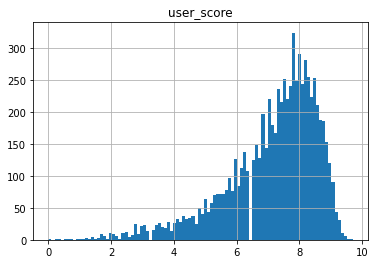

In [20]:
dataset.hist('user_score',bins=100)

In [21]:
dataset['user_score'].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

In [22]:
data_by_platform_2 = dataset.pivot_table(index=['platform', 'genre'] ,values ='user_score',aggfunc='median')

In [23]:
dataset['user_score'].fillna('unknown',inplace=True)

In [24]:
data_by_platform_2.columns = ['user_score_median']

In [25]:
data_by_platform_2.reset_index(inplace=True)

In [26]:
data_by_platform_2

,platform,genre,user_score_median
0,3DS,Action,6.65
1,3DS,Adventure,7.00
2,3DS,Fighting,6.60
3,3DS,Misc,7.30
4,3DS,Platform,7.15
...,...,...,...
193,XOne,Role-Playing,7.20
194,XOne,Shooter,6.90
195,XOne,Simulation,6.30
196,XOne,Sports,5.85


In [27]:
def replace_user_score(row):
    user_score_1=row['user_score']
    if user_score_1=='unknown':
        platform_1= row['platform']
        genre_1= row['genre']
        replacement_value=data_by_platform_2.loc[(data_by_platform_2['genre']==genre_1)&(data_by_platform_2['platform']==platform_1),'user_score_median'].median()
        return replacement_value
    else:
        return user_score_1

In [28]:
dataset['user_score']=dataset.apply(replace_user_score,axis=1)

In [29]:
dataset.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1134
user_score         1127
rating             6766
dtype: int64

- Se eliminaron 7,998 valores ausentes de la columna user_score utilizando una función de reemplazo por mediana basada en género y plataforma, desde un total de 9,125 a un total restante de 1,127.
- Decidí rellenar los valores ausentes de esta manera para no perder la fuente de datos, y no perder la distribución de los datos de como se tiene inicialmente.
- Alguna razón para no tener estos datos disponibles puede ser captura incorrecta o faltante desde los usuarios.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Perfecto, al completar los datos de esta forma se evita perder los datos.
</div>

##### Valores ausentes en rating

<AxesSubplot:>

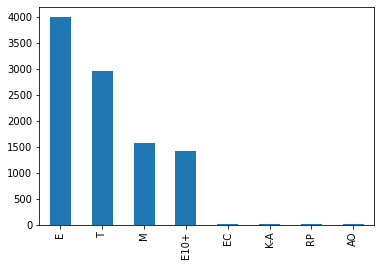

In [30]:
dataset['rating'].value_counts().plot(kind='bar')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien, ordenaste los datos en la gráfica de barras.
</div>

In [31]:
dataset['rating'].describe()

count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object

In [32]:
data_by_platform_3 = dataset.pivot_table(index=['genre', 'rating'] ,values ='platform',aggfunc='count')

In [33]:
dataset['rating'].fillna('unknown',inplace=True)

In [34]:
data_by_platform_3.reset_index(inplace=True)

In [35]:
data_by_platform_3.head(10)

,genre,rating,platform
0,Action,AO,1
1,Action,E,416
2,Action,E10+,481
3,Action,EC,1
4,Action,M,608
5,Action,T,681
6,Adventure,E,162
7,Adventure,E10+,68
8,Adventure,EC,2
9,Adventure,M,99


In [36]:
def replace_rating(row):
    rating_1=row['rating']
    if rating_1=='unknown':
        genre_1= row['genre']
        replacement_value=data_by_platform_3.loc[(data_by_platform_3['genre']==genre_1),'rating'].max()
        return replacement_value
    else:
        return rating_1

In [37]:
dataset['rating']=dataset.apply(replace_rating,axis=1)

In [38]:
dataset.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1134
user_score         1127
rating                2
dtype: int64

- Se eliminaron 6,764 valores ausentes de la columna rating utilizando una función de reemplazo por mediana basada en género, desde un total de 6,766 a un total restante de 2.
- Decidí rellenar los valores ausentes de esta manera para no perder la fuente de datos, y no perder la distribución de los datos de como se tiene inicialmente.
- Alguna razón para no tener estos datos disponibles puede ser captura incorrecta o faltante desde los creadores de los juegos.

##### Valores ausentes restantes

In [39]:
dataset = dataset.dropna().reset_index()

In [40]:
dataset.isna().sum()

index              0
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

- He decidio eliminar el resto de datos ausentes que las funciones no han podido manejar debido a que es un porcentaje despreciable respecto al total de datos disponibles.
- Finalmente procederé a cambiar el tipo de dato de year_of_release de float a int.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Ok, solo faltaría indicar exactamente la cantidad de datos que se perdieron y el porcentaje que representa de los datos totales.
</div>

In [41]:
dataset['year_of_release']=dataset['year_of_release'].astype('int')

##### Añadir columna para las ventas totales

In [42]:
dataset['total_sales']=dataset['na_sales']+dataset['eu_sales']+dataset['jp_sales']+dataset['other_sales']

In [43]:
dataset['total_sales'].head(10)

0    82.54
1    35.52
2    32.77
3    29.80
4    28.91
5    28.32
6    24.67
7    23.21
8    22.70
9    21.82
Name: total_sales, dtype: float64

#### Análisis de los datos

In [44]:
dataset_count_platform = dataset.pivot_table(index='year_of_release', values='platform', aggfunc='count').sort_values('year_of_release')

In [45]:
dataset_count_platform.reset_index(inplace=True)

<AxesSubplot:xlabel='year_of_release'>

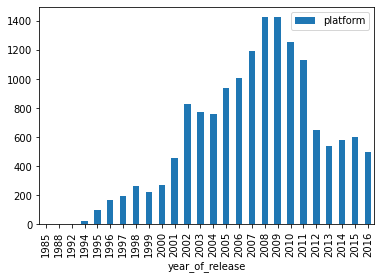

In [46]:
dataset_count_platform.plot(x= 'year_of_release', y='platform', kind='bar')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buena gráfica. Al colocar los años en vertical se ven claramente.
</div>

El número de lanzamientos por año fue creciendo desde 1994 hasta llegar a un máximo en 2009 para luego caer hasta 2016.

##### Ventas anuales por plataforma

In [47]:
sales_pivot = dataset.pivot_table(index=['platform'], values='total_sales',aggfunc='count')

In [48]:
sales_pivot.reset_index(inplace=True)

<AxesSubplot:xlabel='platform'>

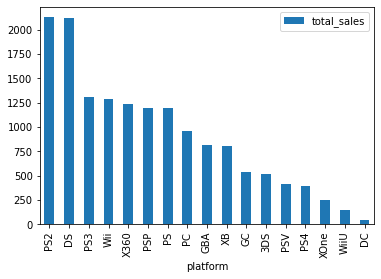

In [49]:
sales_pivot.sort_values(by='total_sales',ascending=False).plot(x= 'platform', y='total_sales', kind='bar')

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Tu grpafica es buena, también podrías agregar otra muy parecida pero en lugar de los conteos incluir los porcentajes de ventas que representa cada plataforma con respecto del total.
</div>

El top 5 de ventas totales por plataforma está compuesto por PS2, DS, PS3, Wii, X360.

###### Ventas anuales para PS2

In [50]:
sales_pivot_with_year = dataset.pivot_table(index=['platform','year_of_release'], values='total_sales',aggfunc='sum')

<AxesSubplot:xlabel='platform,year_of_release'>

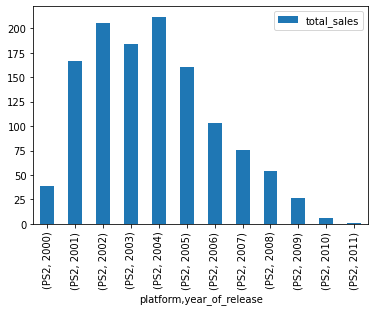

In [51]:
sales_pivot_with_year.query('platform=="PS2"').plot(kind='bar')

###### Ventas anuales para DS

<AxesSubplot:xlabel='platform,year_of_release'>

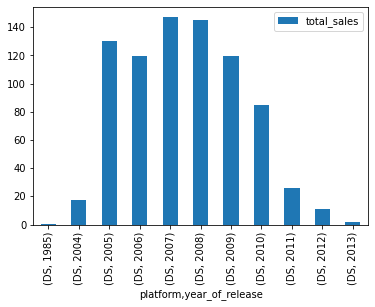

In [52]:
sales_pivot_with_year.query('platform=="DS"').plot(kind='bar')

###### Ventas anuales para PS3

<AxesSubplot:xlabel='platform,year_of_release'>

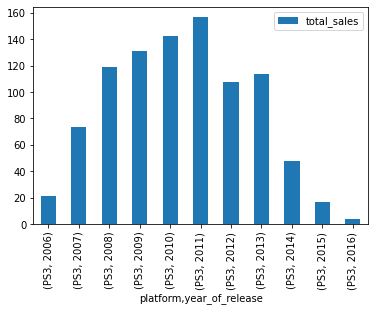

In [53]:
sales_pivot_with_year.query('platform=="PS3"').plot(kind='bar')

La tendencia que se observa en los tres casos graficados arriba es de un aumento de las ventas desde el lanzamiento de la plataforma hasta un pico y una posterior decadencia hasta su muerte.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Perfecto, las gráficas son muy buenas y nos muestran perfectamente las ventas por año.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Estas tres gráficas las podrías realizar juntas con un ciclo for.
</div>

##### Periodo de tiempo de las plataformas

In [54]:
sales_pivot_all = dataset.pivot_table(index=['platform'], values='year_of_release',aggfunc=['max','min'])

In [55]:
sales_pivot_all.reset_index()

,platform,max,min
,,year_of_release,year_of_release
0,3DS,2016,2011
1,DC,2008,1998
2,DS,2013,1985
3,GBA,2007,2000
4,GC,2007,2001
5,PC,2016,1985
6,PS,2003,1994
7,PS2,2011,2000
8,PS3,2016,2006


In [56]:
sales_pivot_all.columns=['last_year','first_year']

In [57]:
sales_pivot_all['first_year'].median()

2004.0

In [58]:
earliest_release_year = sales_pivot_all['first_year'].min()

In [59]:
earliest_release_year

1985

In [60]:
platform_lifespan = sales_pivot_all['last_year'] - sales_pivot_all['first_year']

<AxesSubplot:xlabel='platform'>

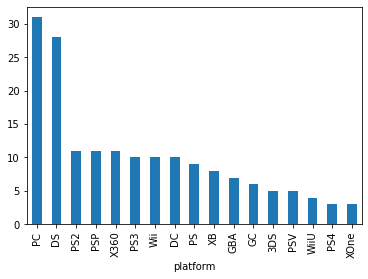

In [61]:
platform_lifespan.sort_values(ascending=False).plot(kind='bar')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy bien. Se ordenaron los datos para que fuera más clara la gráfica, esto es muy importante.
</div>

Lo que se puede observar en este gráfico es que las plataformas más antiguas como PC y DS tenían periodos de vida muy largos (31 y 28 años, respectivamente), mientras que plataformas más nuevas como PS4 y XOne tienen periodos de vida muy cortos (3 años).

##### Comparativo de ventas anuales por plataforma

In [62]:
sales_pivot_by_platform = dataset.query('year_of_release>2004').pivot_table(index=['year_of_release'], columns='platform', values='total_sales',aggfunc='sum')

In [63]:
sales_pivot_by_platform

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2005,NaN,NaN,130.14,33.86,27.62,4.37,160.66,NaN,NaN,43.84,NaN,NaN,NaN,8.25,49.08,NaN
2006,NaN,NaN,119.81,5.28,11.26,2.85,103.42,20.96,NaN,55.32,NaN,137.15,NaN,51.62,10.04,NaN
2007,NaN,0.02,146.94,3.40,0.27,9.28,75.99,73.19,NaN,46.93,NaN,152.77,NaN,95.41,0.55,NaN
2008,NaN,0.04,145.31,NaN,NaN,12.42,53.90,118.52,NaN,34.55,NaN,171.32,NaN,135.26,0.18,NaN
2009,NaN,NaN,119.54,NaN,NaN,16.91,26.40,130.93,NaN,37.78,NaN,206.97,NaN,120.29,NaN,NaN
2010,NaN,NaN,85.02,NaN,NaN,24.28,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN,NaN
2011,63.20,NaN,26.18,NaN,NaN,35.03,0.45,156.78,NaN,17.82,4.60,59.65,NaN,143.84,NaN,NaN
2012,51.36,NaN,11.01,NaN,NaN,23.22,NaN,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN,NaN
2013,56.57,NaN,1.54,NaN,NaN,12.38,NaN,113.25,25.99,3.14,10.42,8.59,21.65,88.58,NaN,18.96


Text(0.5, 1.0, 'Sales by year')

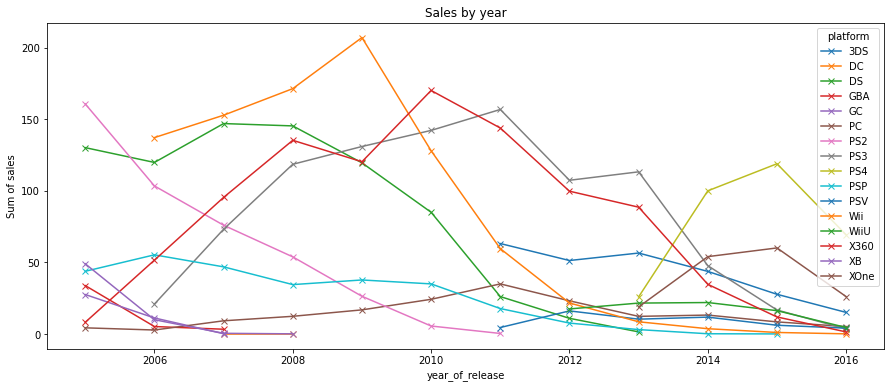

In [64]:
sales_pivot_by_platform.plot(style='x-',figsize=(15,6))
plt.ylabel('Sum of sales')
plt.title('Sales by year')

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

La gráfica es buena los puntos en cada año y la leyenda ayuda a comprenderlo bien.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Como consejo, cuando tengas muchas líneas también considera usar tipos distintos de líneas (punteadas, cortadas, etc.) o diferentes tipos de grosor para que sea más fácil de comprender.
</div>

- Las plataforma líderes en ventas y las más rentables son PS4, XOne y PSP.
- Se observa una reducción del mercado generalizada en donde todas las ventas tienden a disminuir.

##### Ventas globales de todas las plataformas

In [65]:
sales_average_by_platform = dataset.query('year_of_release>2004').pivot_table(index=['year_of_release'], columns='platform', values='total_sales',aggfunc='median')

In [66]:
sales_average_by_platform

platform,3DS,DC,DS,GBA,GC,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,
2005,NaN,NaN,0.130,0.140,0.150,0.030,0.310,NaN,NaN,0.190,NaN,NaN,NaN,0.310,0.13,NaN
2006,NaN,NaN,0.110,0.040,0.155,0.020,0.100,0.380,NaN,0.100,NaN,0.250,NaN,0.240,0.08,NaN
2007,NaN,0.02,0.115,0.205,0.060,0.020,0.120,0.420,NaN,0.120,NaN,0.230,NaN,0.310,0.18,NaN
2008,NaN,0.04,0.100,NaN,NaN,0.020,0.150,0.435,NaN,0.130,NaN,0.210,NaN,0.465,0.18,NaN
2009,NaN,NaN,0.110,NaN,NaN,0.040,0.165,0.345,NaN,0.090,NaN,0.200,NaN,0.255,NaN,NaN
2010,NaN,NaN,0.110,NaN,NaN,0.060,0.055,0.340,NaN,0.060,NaN,0.190,NaN,0.280,NaN,NaN
2011,0.145,NaN,0.080,NaN,NaN,0.080,0.060,0.240,NaN,0.060,0.130,0.170,NaN,0.225,NaN,NaN
2012,0.190,NaN,0.030,NaN,NaN,0.120,NaN,0.305,NaN,0.040,0.190,0.190,0.230,0.435,NaN,NaN
2013,0.100,NaN,0.150,NaN,NaN,0.175,NaN,0.310,1.530,0.025,0.105,0.185,0.220,0.430,NaN,0.800


<AxesSubplot:>

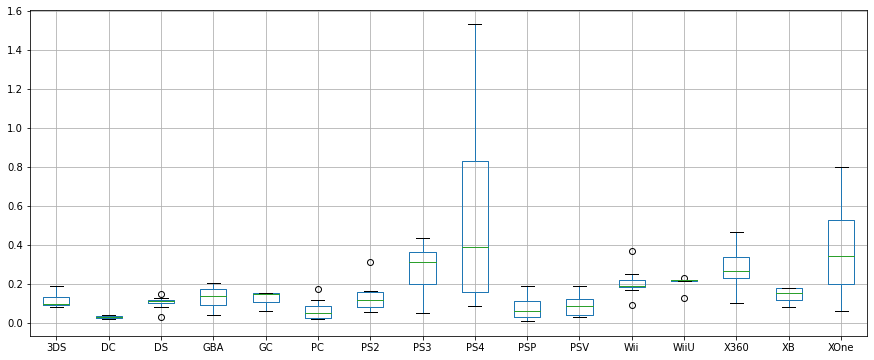

In [67]:
sales_average_by_platform.boxplot(figsize = (15, 6))

- La distribución de ventas promedio anuales por plataforma es muy diversa, existen plataformas muy exitosas con pico de ventas anuales promedio por encima de 1.5 como el PS4 y plataformas con ventas anuales muy cerradas año tras añoa como el DC o el XB.
- Las ventas promedio de varias plataformas están muy cerradas respecto a sus cuartiles, lo que significa que sus ventas año tras año fueron muy similares sin realmente presentar ningún crecimiento.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien hecho, los boxplots están en la misma escala y esto ayuda a compararlos.
</div>

##### Correlación de reseñas de los usuarios contra ventas

###### Correlación de reseñas contra ventas para XBOX 360

In [68]:
X360_data = dataset.query('platform=="X360"')[['name','year_of_release','critic_score','user_score','total_sales']]

In [69]:
X360_data

,name,year_of_release,critic_score,user_score,total_sales
9,Kinect Adventures!,2010,61.0,6.3,21.82
15,Grand Theft Auto V,2013,97.0,8.1,16.27
21,Call of Duty: Modern Warfare 3,2011,88.0,3.4,14.73
23,Call of Duty: Black Ops,2010,87.0,6.3,14.62
26,Call of Duty: Black Ops II,2012,83.0,4.8,13.68
...,...,...,...,...,...
15234,Dragon Ball Z for Kinect,2012,49.0,2.1,0.01
15243,World Snooker Championship 2007,2007,73.0,6.6,0.01
15268,Metal Gear Solid HD Edition,2011,69.0,7.2,0.01
15275,Ben 10 Omniverse 2,2013,69.0,5.1,0.01


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

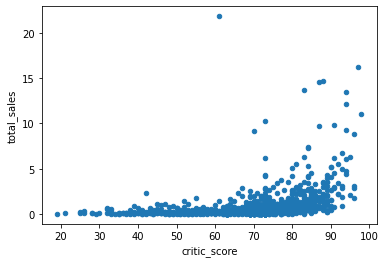

In [70]:
X360_data.plot(x='critic_score',y='total_sales',kind='scatter')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

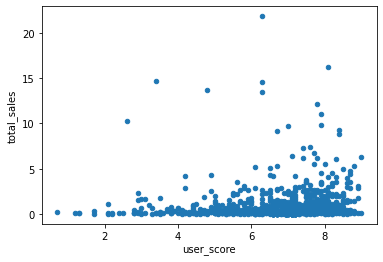

In [71]:
X360_data.plot(x='user_score',y='total_sales',kind='scatter')

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buenas gráficas. También recuerda que puedes usar la variable alpha=0.5 para que los puntos tengan un poco de transparencia y saber en donde se acumulan.
</div>

In [72]:
X360_data['critic_score'].corr(X360_data['total_sales'])

0.36556115161676217

In [73]:
X360_data['user_score'].corr(X360_data['total_sales'])

0.09515840827705238

La correlación de ventas contra user_score y critic_score es muy débil en la plataforma X360. No existe un patrón que indique que las mejores críticas mejoren las ventas de manera contundente.

###### Correlación de reseñas contra ventas para Wii

In [74]:
Wii_data = dataset.query('platform=="Wii"')[['name','year_of_release','critic_score','user_score','total_sales']]

In [75]:
Wii_data

,name,year_of_release,critic_score,user_score,total_sales
0,Wii Sports,2006,76.0,8.00,82.54
1,Mario Kart Wii,2008,82.0,8.30,35.52
2,Wii Sports Resort,2009,80.0,8.00,32.77
4,Wii Play,2006,58.0,6.60,28.91
5,New Super Mario Bros. Wii,2009,87.0,8.40,28.32
...,...,...,...,...,...
15210,Bomberman,2008,65.0,7.40,0.01
15247,The Ultimate Battle of the Sexes,2010,64.0,7.10,0.01
15285,Mahou Sensei Negima!? Neo-Pactio Fight!!,2007,71.5,7.60,0.01
15306,Help Wanted: 50 Wacky Jobs (jp sales),2008,65.0,7.25,0.01


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

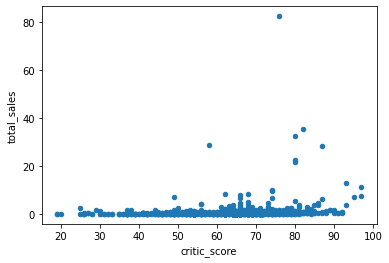

In [76]:
Wii_data.plot(x='critic_score',y='total_sales',kind='scatter')

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

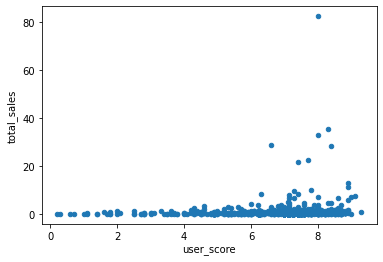

In [77]:
Wii_data.plot(x='user_score',y='total_sales',kind='scatter')

In [78]:
Wii_data['critic_score'].corr(Wii_data['total_sales'])

0.15950230883565852

In [79]:
Wii_data['user_score'].corr(Wii_data['total_sales'])

0.08397657435188316

La correlación de ventas contra user_score y critic_score es muy débil en la plataforma Wii. No existe un patrón que indique que las mejores críticas mejoren las ventas de manera contundente.

##### Distribución de las ventas por género

In [80]:
data_by_genre=dataset.pivot_table(index='genre',columns='platform',values='total_sales',aggfunc='sum',margins=True).sort_values(('All'),ascending=False)

In [81]:
data_by_genre

platform,3DS,DC,DS,GBA,GC,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne,All
genre,,,,,,,,,,,,,,,,,,
All,257.81,14.69,802.78,312.88,196.73,255.76,727.58,1233.56,931.34,314.14,289.53,53.38,891.18,82.19,961.24,251.57,159.32,7735.68
Action,57.84,NaN,111.31,54.13,37.11,30.71,125.70,272.38,297.87,96.10,62.03,17.02,106.67,19.07,236.71,47.44,37.31,1609.40
Sports,6.15,3.65,31.27,16.32,24.36,11.97,119.49,262.67,133.15,55.61,39.76,4.19,286.49,3.16,136.69,52.89,26.74,1214.56
Shooter,1.22,0.33,7.86,3.56,13.61,43.90,39.33,108.20,192.29,88.56,19.63,3.88,25.69,6.01,275.62,62.13,60.33,952.15
Role-Playing,84.20,0.68,124.17,64.20,13.04,47.25,78.40,91.61,73.65,28.99,48.86,12.15,13.71,2.89,71.39,13.51,10.55,779.25
Misc,10.99,NaN,135.56,36.09,16.44,8.40,44.88,98.63,44.93,8.19,13.62,4.43,212.67,12.46,88.95,8.57,7.43,752.24
Racing,14.87,2.65,37.96,18.81,21.77,3.78,102.91,154.33,71.31,12.14,34.33,2.51,60.13,7.87,64.13,31.32,9.79,650.61
Platform,32.53,2.53,75.80,77.99,28.59,0.46,64.22,72.13,29.32,7.69,17.07,2.56,88.87,21.53,11.29,9.63,0.93,543.14
Fighting,10.56,1.83,7.08,4.16,18.43,0.15,72.74,89.20,51.11,8.65,21.73,2.62,23.36,6.27,37.32,12.80,2.45,370.46


<AxesSubplot:xlabel='genre'>

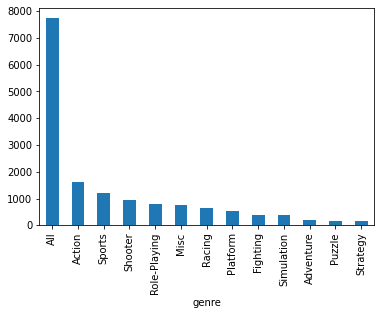

In [82]:
data_by_genre['All'].plot(kind='bar')

- Los géneros que generan más ventas históricamente son Action, Sports, y Shooter. Éstos son géneros que han estado presentes por un tiempo prolongado y tienen una buena aceptación generalizada.
- Los géneros que generan menos ventas son Adventure, Puzzle, y Strategy. Éstos son géneros que podrían llamarse de nicho, tienen aceptación por un grupo específico de usuarios solamente.

#### Perfil de usuario por región

##### Plataformas principales por región

In [83]:
Regional_profile=dataset.pivot_table(index=['platform','genre'],values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')

In [84]:
Regional_profile.reset_index(inplace=True)

In [85]:
Regional_profile

,platform,genre,eu_sales,jp_sales,na_sales
0,3DS,Action,12.66,22.66,19.62
1,3DS,Adventure,0.79,2.76,1.10
2,3DS,Fighting,2.21,3.22,4.46
3,3DS,Misc,2.38,5.51,2.69
4,3DS,Platform,10.51,6.48,13.27
...,...,...,...,...,...
192,XOne,Role-Playing,3.43,0.01,6.15
193,XOne,Shooter,17.80,0.16,36.86
194,XOne,Simulation,0.31,0.00,0.32
195,XOne,Sports,8.73,0.02,15.59


In [86]:
NA_top_platform = Regional_profile.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()

<AxesSubplot:xlabel='platform'>

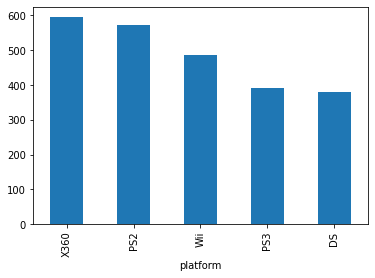

In [87]:
NA_top_platform.plot(kind='bar')

Las plataformas más vendedoras históricamente para la región de NA son X360, PS2, Wii, PS3 y DS.

In [88]:
EU_top_platform = Regional_profile.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()

<AxesSubplot:xlabel='platform'>

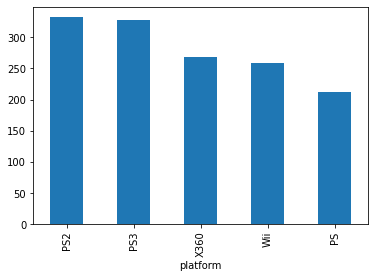

In [89]:
EU_top_platform.plot(kind='bar')

Las plataformas más vendedoras históricamente para la región de EU son PS2, PS3, X360, Wii y PS.

In [90]:
JP_top_platform = Regional_profile.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()

<AxesSubplot:xlabel='platform'>

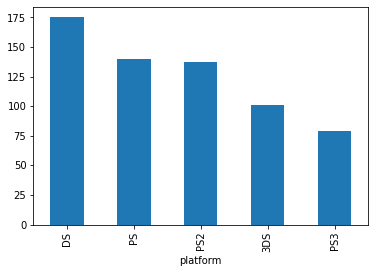

In [91]:
JP_top_platform.plot(kind='bar')

Las plataformas más vendedoras históricamente para la región de JP son DS, PS, PS2, 3DS y PS3.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

¡Genial! Con este análisis creaste un perfil por región que puede ayudar a comprender como se comportan las regiones con las plataformas.
</div>

##### Géneros principales por región

In [92]:
NA_top_genre = Regional_profile.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()

<AxesSubplot:xlabel='genre'>

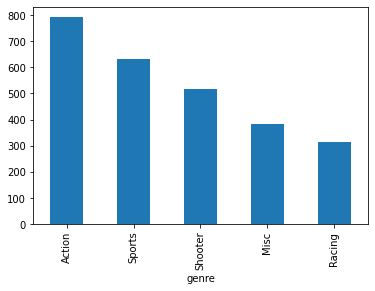

In [93]:
NA_top_genre.plot(kind='bar')

Los géneros más vendedores históricamente para la región de NA son Action, Sports, Shooter, Misc y Racing.

In [94]:
EU_top_genre = Regional_profile.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()

<AxesSubplot:xlabel='genre'>

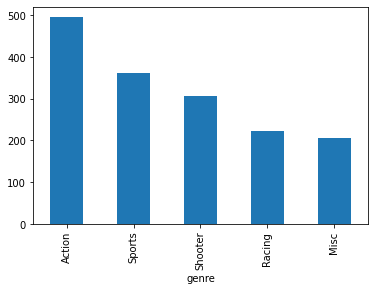

In [95]:
EU_top_genre.plot(kind='bar')

Los géneros más vendedores históricamente para la región de EU son Action, Sports, Shooter, Misc y Racing.

In [96]:
JP_top_genre = Regional_profile.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()

<AxesSubplot:xlabel='genre'>

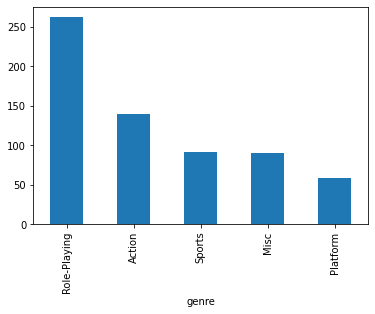

In [97]:
JP_top_genre.plot(kind='bar')

Los géneros más vendedores históricamente para la región de JP son Role, Action, Sports, Misc y Platform.

##### Correlación de rating contra ventas por región

In [98]:
Regional_rating=dataset.pivot_table(index=['rating'],values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')

In [99]:
Regional_rating

,eu_sales,jp_sales,na_sales
rating,,,
AO,0.61,0.00,1.26
E,703.84,197.96,1274.21
E10+,183.35,40.20,345.50
EC,0.11,0.00,1.53
K-A,0.27,1.46,2.56
M,480.00,63.58,742.89
RP,0.03,0.00,0.00
T,891.20,613.86,1431.53


<AxesSubplot:xlabel='rating'>

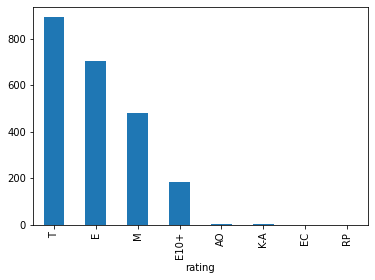

In [100]:
Regional_rating['eu_sales'].sort_values(ascending=False).plot(kind='bar')

La clasificación ESRB más vendedora históricamente para la región EU es T(een), seguida de E(veryone) y M(ature).

<AxesSubplot:xlabel='rating'>

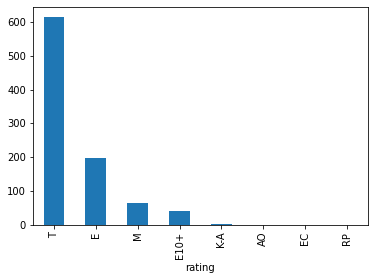

In [101]:
Regional_rating['jp_sales'].sort_values(ascending=False).plot(kind='bar')

La clasificación ESRB más vendedora históricamente para la región JP es T(een), seguida de E(veryone) y M(ature).

<AxesSubplot:xlabel='rating'>

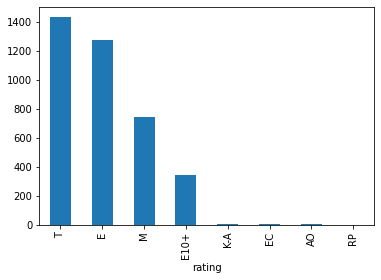

In [102]:
Regional_rating['na_sales'].sort_values(ascending=False).plot(kind='bar')

La clasificación ESRB más vendedora históricamente para la región NA es T(een), seguida de E(veryone) y M(ature).

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien, con todos esta información podrías realizar un perfil más exacto por región.
</div>

#### Pruebas de hipótesis

***Hipótesis nula = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.***

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Definiste correctamente la hipótesis a probar.
</div>

In [103]:
XOne_user_score = dataset[dataset['platform']=='XOne']['user_score']
PC_user_score = dataset[dataset['platform']=='PC']['user_score']

In [104]:
print(XOne_user_score.mean())
print(PC_user_score.mean())

6.620647773279352
7.17042842215256


In [105]:
print(np.var(XOne_user_score))
print(np.var(PC_user_score))

1.4701202281630579
1.939700234427291


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Muy bien, calculaste las varianzas para saber si se puede usar el parámetro `equal_var=False`.
</div>

In [106]:
print(len(XOne_user_score))
print(len(PC_user_score))

247
957


In [107]:
alpha = 0.05
results = st.ttest_ind(XOne_user_score,PC_user_score,equal_var=False)
print('p_value',results.pvalue)

if (results.pvalue < alpha):
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

p_value 1.8314447814917828e-09
Se rechaza la hipótesis nula


La probabilidad de que una diferencia tan grande entre la calificación de ususario promedio de XOne y PC sea aleatoria es demasiado baja, por lo que se desecha la hipótesis nula. O sea, las calificaciones promedio de usuario entre éstas dos plataformas son diferentes.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Interpretaste correctamente el p-valor de la prueba de hipótesis.
</div>

***Hipótesis nula = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.***

In [108]:
Action_user_score = dataset[dataset['genre']=='Action']['user_score']
Sports_user_score = dataset[dataset['genre']=='Sports']['user_score']

In [109]:
print(Action_user_score.mean())
print(Sports_user_score.mean())

7.163527559055118
7.235364705882354


In [110]:
print(np.var(Action_user_score))
print(np.var(Sports_user_score))

1.2351768476656952
1.58146580816609


In [111]:
print(len(Action_user_score))
print(len(Sports_user_score))

3175
2125


In [112]:
alpha = 0.05
results = st.ttest_ind(Action_user_score,Sports_user_score,equal_var=False)
print('p_value',results.pvalue)

if (results.pvalue < alpha):
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')

p_value 0.03294093436297286
Se rechaza la hipótesis nula


La probabilidad de que una diferencia tan grande entre la calificación de ususario promedio del género Action y el género Sports sea aleatoria es más baja que el estadístico de prueba, por lo que se desecha la hipótesis nula. O sea, las calificaciones promedio de usuario entre éstos dos géneros son diferentes.

El criterio utilizado para probar la hipótesis nula en ambos casos corresponde a una  hipótesis de dos colas, sobre la igualdad de las medias tomando en cuenta tamaños de muestra y varianzas diferentes.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bien realizaste correctamente la prueba de hipótesis.
</div>

#### Conclusión general

- El número de lanzamientos de videojuegos por año vió un crecimiento desde 1994 hasta llegar a un máximo en 2009 para luego caer hasta 2016.
- El top 5 de ventas totales por plataforma está compuesto por PS2, DS, PS3, Wii, X360.
- La tendencia que se observa en el mercado de videojuegos es de un aumento de las ventas desde el lanzamiento de la plataforma hasta un pico y una posterior decadencia hasta su muerte.
- Las plataformas más antiguas como PC y DS tenían periodos de vida muy largos (31 y 28 años, respectivamente), mientras que plataformas más nuevas como PS4 y XOne tienen periodos de vida muy cortos (3 años).
- Las plataforma líderes en ventas y las más rentables actualmente son PS4, XOne y PSP.
- Se observa una reducción del mercado generalizada en donde todas las ventas tienden a disminuir.
- La correlación de ventas contra user_score y critic_score es muy débil en general, aunque si afecta no es definitiva para el crecimiento de ventas por plataforma.
- Los géneros que generan más ventas históricamente son Action, Sports, y Shooter. 
- Los géneros que generan menos ventas son Adventure, Puzzle, y Strategy. 
- Las plataformas más vendedoras históricamente son X360, PS2, Wii, PS3 y DS.
- Los géneros más vendedores históricamente son Action, Sports, Shooter, Misc y Racing.
- La clasificación ESRB más vendedora históricamente para todas las regiones son T(een), seguida de E(veryone) y M(ature).

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Buenas conclusiones, se basan en los resultados obtenidos en el proyecto.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

¡Hola!
    
Te quiero felicitar por tu trabajo, se nota el esfuerzo y dedicación invertido en él. Las pruebas de hipótesis se plantearon correctamente y se interpretaron bien, esta herramienta estadística la dominas muy bien. También tus gráficas son buenas y se pueden usar en algún reporte o presentación, siempre recuerda incluir títulos y leyendas para que sean autocontenidas.
    
Deje comentarios opcionales en celdas de color amarillo, pero no tienes que cambiar nada puedo aprobar tu proyecto.
 
Saludos,
Marcos.
    
</div>